# Data Visualization for fordgobike

## data set over view

information about a bike ride trip supported by Udacity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter("ignore")


In [2]:
ford = pd.read_csv('201902-fordgobike-tripdata .csv')
ford.head()

duration_sec        start_time         end_time  start_station_id  \
0         52185   2/28/19 5:32 PM   3/1/19 8:01 AM              21.0   
1         42521   2/28/19 6:53 PM   3/1/19 6:42 AM              23.0   
2         61854  2/28/19 12:13 PM   3/1/19 5:24 AM              86.0   
3         36490   2/28/19 5:54 PM   3/1/19 4:02 AM             375.0   
4          1585  2/28/19 11:54 PM  3/1/19 12:20 AM               7.0   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                     The Embarcadero at Steuart St               37.791464   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   

   start_station_longitude  end_station_id  \
0              -122.400811            13.0   
1              -122.391034            81.0   
2              -122.426826             3.0   
3              -122.446546            70.0   
4              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
ford.start_time = pd.to_datetime(ford.start_time)
ford.end_time = pd.to_datetime(ford.end_time)
ford.bike_share_for_all_trip = (ford.bike_share_for_all_trip == 'Yes')

In [4]:
ford['start_month'] = ford.start_time.dt.month
ford['start_weekday'] = ford.start_time.dt.weekday 
ford['start_hour'] = ford.start_time.dt.hour
ford['duration_minutes'] = ford['duration_sec']/60

In [5]:
# lets see an information about the data 
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
ford.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453705        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  start_month  \
count          183412.000000  183412.000000      175147.000000     183412.0   
mean             -122.352250    4472.906375        1984.806437          2.0   
std                 0.116673    1664.383394          10.116689          0.0   
min              -122.453705      11.000000        1878.000000          2.0   
25%              -122.411726    3777.000000        1980.000000          2.0   
50%              -122.398279    4958.000000        1987.000000          2.0   
75%              -122.288045    5502.000000        1992.000000          2.0   
max              -121.874119    6645.000000        2001.000000          2.0   

       start_weekday     start_hour  duration_minutes  
count  183412.000000  183412.000000     183412.000000  
mean        2.632178      13.458607         12.101307  
std         1.814786       4.724941         29.906496  
min         0.000000       0.000000          1.016667  
25%         1.000000       9.000000          5.416667  
50%         3.000000      14.000000          8.566667  
75%         4.000000      17.000000         13.266667  
max         6.000000      23.000000       1424.066667

## What is/are the main feature(s) of interest in your dataset?

there is many interest in this data but i will look into the average in the trip duration. 

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

by looking to the data i think the trip duration will help this investigate 
i will look to the duration by second and minutes.

## Univariate Exploration

first thing let's see how many type of users , then we will see the average of the trip by minutes.

#### In the data there is two type of user

In [7]:
ford.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

#### Whant to see the user percentage 

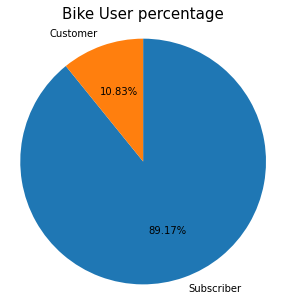

In [8]:
plt.figure(figsize=(10,5))
sorted_counts = ford['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User percentage', fontsize=15);

##### in the plot the subscriber got the higher percentage with 89.17%

## lets count the users beside the overall users in year 2019

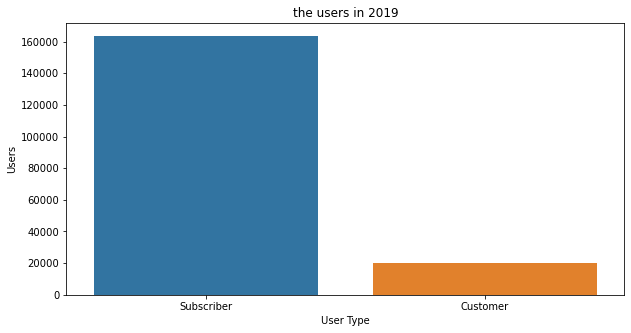

In [9]:
plt.figure(figsize=[10, 5])
user_category = ford['user_type'].value_counts().index
sns.countplot(data = ford, x = 'user_type', order = user_category)
plt.title('the users in 2019')
plt.xlabel('User Type')
plt.ylabel('Users')
plt.show()

#### so in 2019 the subscribers is more than 160000 when the customer < 30000 , by looking to the chart the subscribers maybe will increase over the years.   

## The average of the trip in minutes

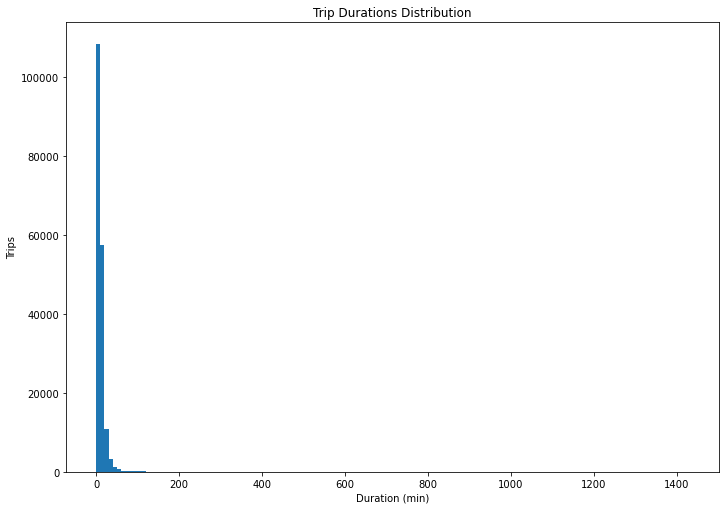

In [10]:
binsize = 10
bins = np.arange(0, ford['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = ford, x = 'duration_minutes', bins = bins)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.show()

####  (right skewed)

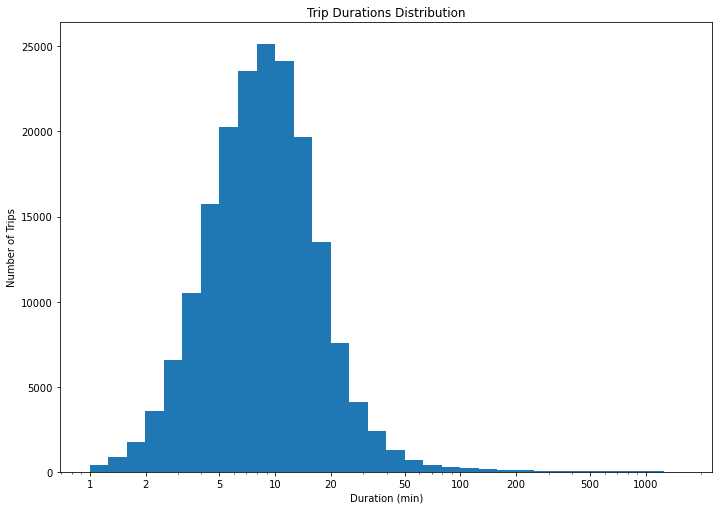

In [11]:
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(ford['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = ford, x = 'duration_minutes', bins = log_bins)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

25000 of trips standing between 8 to 10 minutes.

## now let's compare between the start station and end station

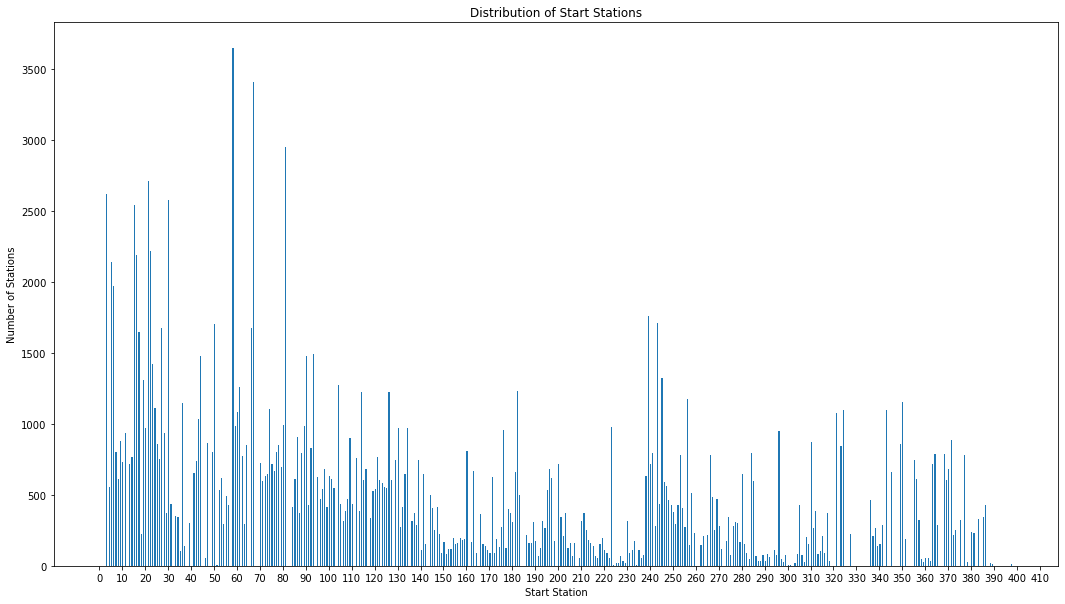

In [12]:
#start

binsize = 0.5
bins = np.arange(0, ford['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 450, 10))
plt.hist(data = ford.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

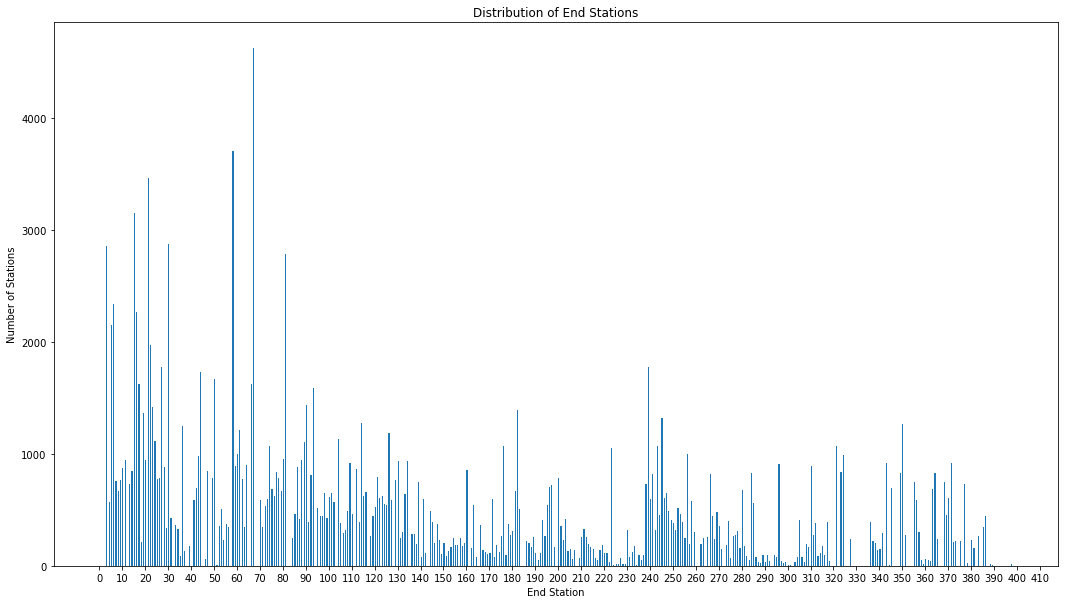

In [13]:
#end

binsize = 0.5
bins = np.arange(0, ford['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 450, 10))
plt.hist(data = ford.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

#### the plots shows we did'nt get any big diffrent between the start station and the end station.

### lets see the days or the daily ride

In [14]:
# count the weekdays and months
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## so what is the most day got the highly riders? 

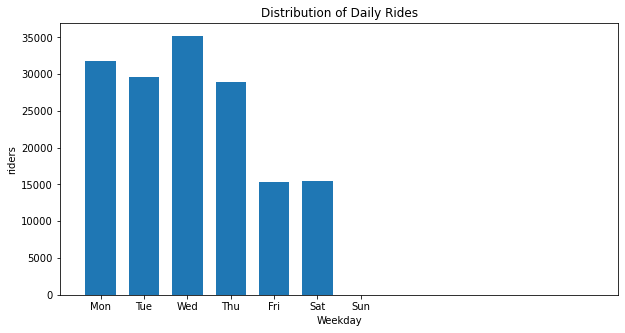

In [15]:
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.figure(figsize=[10,5])
plt.hist(data = ford, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 7 + 1, 1),weekdays)
plt.xlabel('start_weekday')
plt.title('Distribution of Daily Rides')
plt.xlabel('Weekday')
plt.ylabel('riders')
plt.show()

### i think most of the riders are employees , the wednesday is the highly day with almost 35000 riders    

# what about the users and the age ?

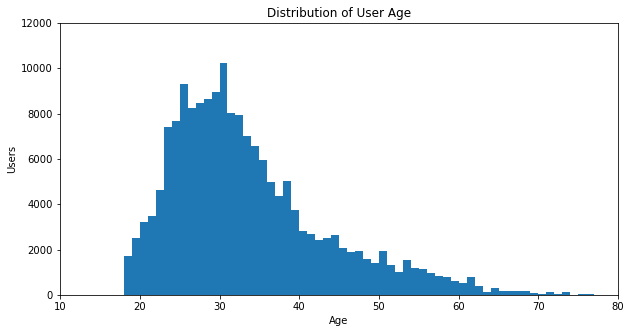

In [16]:
binsize = 1
bins = np.arange(0, ford['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = ford.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Users')
plt.show()

so age 30 is most users more than 10000 , overall from 25 and 40 are the most users by age

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

its the trip duration took a large , i need to do a log transformation 

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


what value i looking for it showed ,  there no unusual distributions

## Bivariate Exploration

lets see the correlation between the trip and the age

## what is the correlation between the trip and the age ?

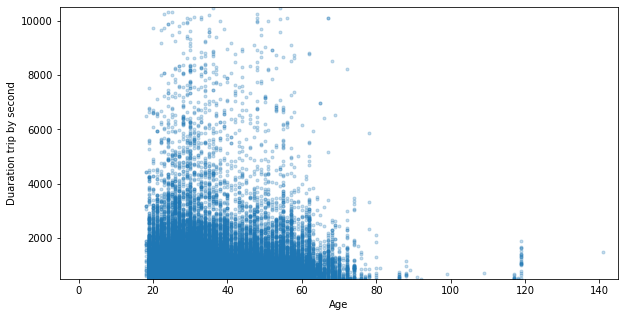

In [17]:
plt.figure(figsize=[10,5])
plt.scatter((2019 - ford['member_birth_year']), ford['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age')
plt.ylabel('Duaration trip by second')
plt.show()

ages between 20< age <60 the duration trip are high , and then from 60< age <80 the duration trip decrease but not all of it in age 80 we got 6000 sec and thats high.

## let's the the gender types and the duration trip 

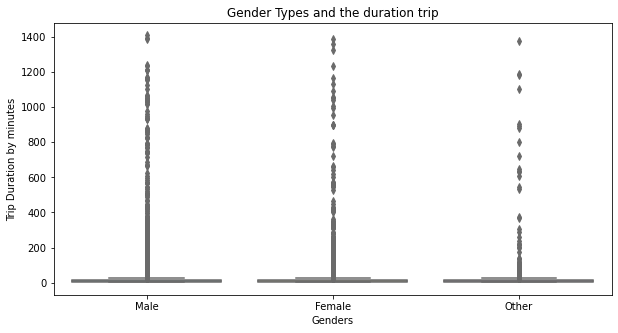

In [18]:
# trip duration by minutes
plt.figure(figsize = [10, 5])
sns.boxplot(data = ford, x='member_gender', y='duration_minutes', palette = 'Set3', order=['Male', 'Female', 'Other'])
plt.title('Gender Types and the duration trip')
plt.xlabel('Genders')
plt.ylabel('Trip Duration by minutes')
plt.show()

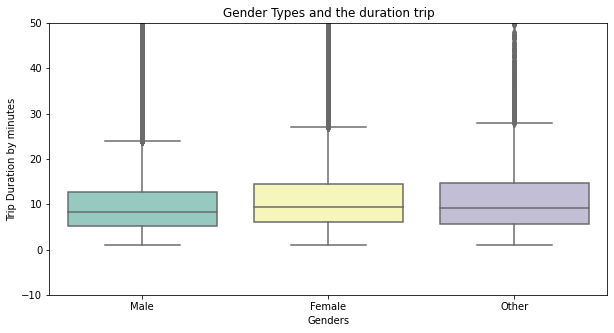

In [19]:
plt.figure(figsize = [10, 5])
sns.boxplot(data = ford, x='member_gender', y='duration_minutes', palette ='Set3', order=['Male', 'Female', 'Other'])
plt.ylim(-10, 50)
plt.title('Gender Types and the duration trip')
plt.xlabel('Genders')
plt.ylabel('Trip Duration by minutes')
plt.show()

this plot shows the female and other got higher trip duration than male 

## what is the the trip duration 

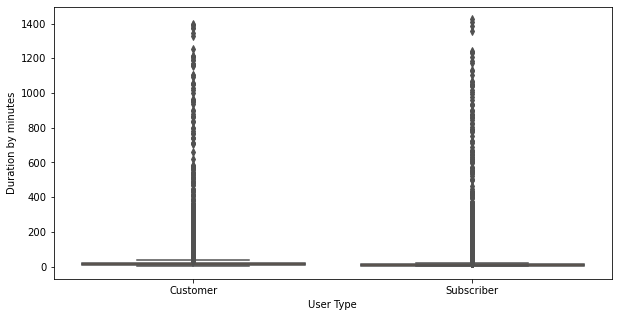

In [20]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = ford, x = 'user_type', y = 'duration_minutes', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration by minutes')
plt.show()

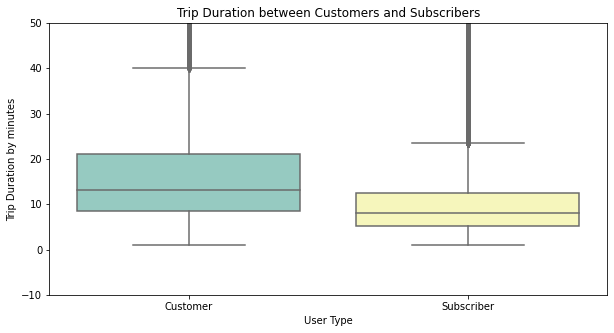

In [21]:
plt.figure(figsize = [10, 5])
sns.boxplot(data = ford, x='user_type', y='duration_minutes', palette ='Set3')
plt.ylim(-10, 50)
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration by minutes')
plt.show()

clearly that the customer spending more time rather than the subscriber.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

i see when the age increase the trip duration decrease (inverse relationships)

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I was expecting to find that the male will got the higher duration trip but the male gender become the lowest all of them and  customer spending more time rather than the subscriber. 

## Multivariate Exploration

I want to see is there any difference or effect by age , gender and trip duration

## let's show the age , gender and trip duration 
#### first by the seconde

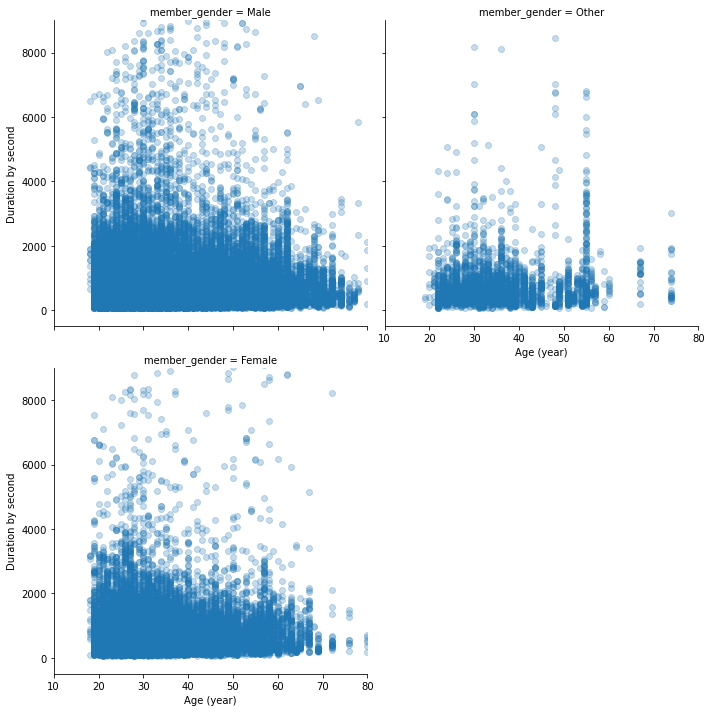

In [22]:
# this plot by second
ford['age'] = (2019 - ford['member_birth_year'])
genders = sns.FacetGrid(data = ford, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration by second')

plt.show()

## here by minutes

<Figure size 1080x720 with 0 Axes>

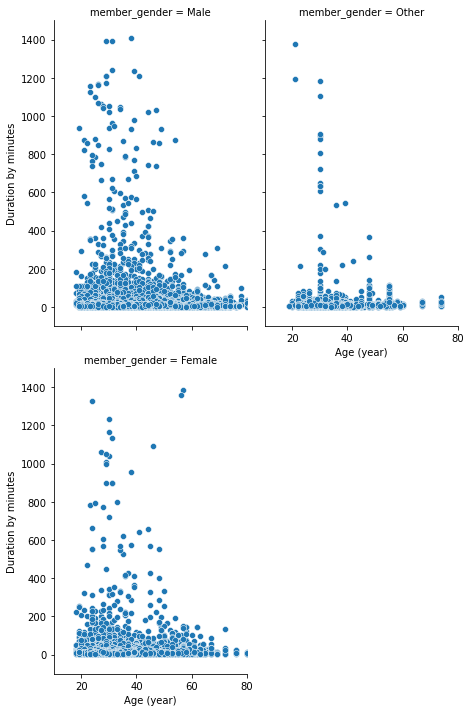

In [23]:
# this plot by minutes
plt.figure(figsize=[15,10])
g = sns.FacetGrid(data = ford, col = 'member_gender', col_wrap = 2, height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sns.scatterplot, 'age', 'duration_minutes', alpha= None)
g.set_axis_labels('Age (year)', 'Duration by minutes')
g.add_legend()
plt.show()


by the plots that is cleary the male and female almost in same average , age less than 60 they are the most riders.

## want to know how many bikes we analyzed the data on 

In [24]:
# want to know how many bikes we analyzed the data on 
ford.bike_id.nunique()

4646

so we analyze this data on 4646 bikes

### THE END 